In [0]:
!pip install tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


In [0]:
from google.colab import files

In [6]:
uploaded= files.upload()

Saving GOOG (1).csv to GOOG (1).csv


In [0]:
data = pd.read_csv('GOOG (1).csv')

In [8]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,529.795471,531.141724,524.360352,524.958740,524.958740,1368200
1,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500
2,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800
3,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900
4,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000


In [9]:
sc=MinMaxScaler(feature_range=(0,1))
sc

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
x=data.iloc[:,1:4].values
x


array([[ 529.795471,  531.141724,  524.360352],
       [ 527.561584,  529.815369,  522.665039],
       [ 521.827332,  522.894409,  511.655243],
       ...,
       [1017.150024, 1043.890015,  997.      ],
       [1049.619995, 1055.560059, 1033.099976],
       [1050.959961, 1052.699951, 1023.590027]])

In [12]:
x=sc.fit_transform(x)
x

array([[0.04693277, 0.04686902, 0.04999415],
       [0.04406036, 0.04516697, 0.04777165],
       [0.03668705, 0.03628566, 0.03333815],
       ...,
       [0.67359064, 0.70485274, 0.66960974],
       [0.71534169, 0.71982831, 0.71693567],
       [0.71706467, 0.71615808, 0.70446843]])

In [13]:
x[:5]

array([[0.04693277, 0.04686902, 0.04999415],
       [0.04406036, 0.04516697, 0.04777165],
       [0.03668705, 0.03628566, 0.03333815],
       [0.02609515, 0.02584939, 0.01763654],
       [0.0158366 , 0.01442007, 0.01580619]])

In [14]:
len(x)

1007

In [0]:
x_train = []
y_train = []
for i in range(10,1007):
  x_train.append(x[i-10:i, 0])
  y_train.append(x[i, 0])

In [16]:
x_train[0]

array([0.04693277, 0.04406036, 0.03668705, 0.02609515, 0.0158366 ,
       0.00428295, 0.01296423, 0.00037188, 0.0053729 , 0.        ])

In [17]:
y_train[0]

0.014002886901701705

In [0]:
x_train, y_train= np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(loss='mean_squared_error')

In [21]:
history=model.fit(x_train, y_train, epochs=20, batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 997 samples
Epoch 1/20
997/997 [==============================] - 4s 4ms/sample - loss: 0.1070
Epoch 2/20
997/997 [==============================] - 1s 552us/sample - loss: 0.0164
Epoch 3/20
997/997 [==============================] - 1s 542us/sample - loss: 0.0208
Epoch 4/20
997/997 [==============================] - 1s 527us/sample - loss: 0.0106
Epoch 5/20
997/997 [==============================] - 1s 534us/sample - loss: 0.0131
Epoch 6/20
997/997 [==============================] - 1s 548us/sample - loss: 0.0104
Epoch 7/20
997/997 [==============================] - 1s 530us/sample - loss: 0.0118
Epoch 8/20
997/997 [==============================] - 1s 527us/sample - loss: 0.0096
Epoch 9/20
997/997 [==============================] - 1s 543us/sample - loss: 0.0111
Epoch 10/20
997/997 [==============================] - 1s 535us/sample - loss: 0.0108
Epoch 11/20
997/997 [===============

In [0]:
predictions=model.predict(x_train)

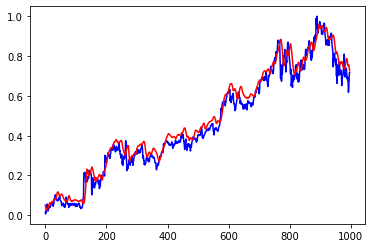

In [23]:
plt.plot(range(len(x_train)), y_train, c='b')
plt.plot(range(len(x_train)), predictions, c='r')